## **Mô tả**
Bộ dữ liệu GDP list chứa dữ liệu dự báo về GDP của một số quốc gia, các thông tin được thống kê bao gồm:

- Country: Tên quốc gia
- Continent: Tên châu lục
- GDP (millions of US$): GDP tính theo đơn vị triệu USD

Hãy đưa bộ dữ liệu vào phân tích và giải đáp các thắc mắc sau:
- Bộ dữ liệu chứa bao nhiêu dòng, bao nhiêu cột
- Thang đo tương ứng của các thuộc tính được lưu trữ
- GDP của các quốc gia có đồng đều không
- Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu
- Tổng GPD của các châu lục
-Top 10 quốc gia có GDP cao nhất

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Reading the CSV file
gdp = pd.read_csv('GDPlist.csv', encoding='ISO-8859-1')

In [3]:
# Displaying the DataFrame
gdp.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [4]:
gdp.tail()

,Country,Continent,GDP (millions of US$)
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675
124,Zambia,Africa,19206


In [5]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


- Bộ dữ liệu chứa 125 dòng, 3 cột

Nhận diện thang đo:

- Country, Continent: có kiểu object –> norminal attribute
- GDP (millions of US$): là dữ liệu dạng số nguyên (int64)


In [7]:
list_country = gdp.Country.unique()
list_country.size

125

### **GDP của các quốc gia có đồng đều không?**

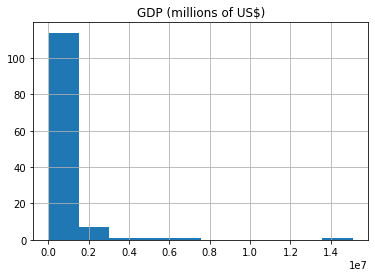

In [69]:
# Hint: Sử dụng dụng biểu đồ histogram để phân tích sự đồng đều về GDP của các quốc gia
gdp.hist()
plt.show()

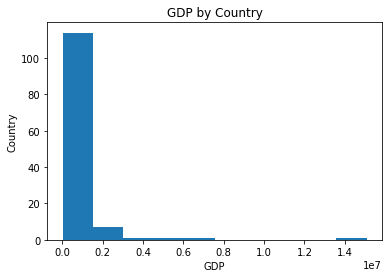

In [73]:
# Creating a basic histogram
import matplotlib.pyplot as plt
plt.hist(gdp['GDP (millions of US$)'], bins = 10)
plt.title("GDP by Country")
plt.xlabel("GDP")
plt.ylabel("Country")
plt.show()

In [77]:
1.4* 10**7

3000000.0

**Nhận xét:**

+ GDP (millions of US$) giữa các quốc gia không đồng đều

+ Các nước có GDP/người cao chiếm rất ít
+ Phần lớn các quốc gia (hơn 100 nước) có GDP khoảng 1tr đô
+ Chỉ có số ít quốc gia có GDP xấp xỉ hơn 14tr đô

### **Mỗi châu lục có bao nhiêu quốc gia nằm trong bảng dữ liệu**

In [8]:
print("Số quốc gia ở các châu lục")
gdp.Continent.value_counts()

Số quốc gia ở các châu lục


Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

**Nhận xét:**

+ Châu Âu và Châu Á cố số lượng các quốc gia lớn nhất và xấp xỉ nhau, đứng thứ 3 là Châu Phi

+ Châu Đại Dương thấp nhất chỉ có 3 nước

### **Tổng GPD của các châu lục**

In [53]:
print("Tổng GDP của các châu lục")
total_GDP_continent = gdp.groupby('Continent')['GDP (millions of US$)'].sum().sort_values(ascending=False)
total_GDP_continent

Tổng GDP của các châu lục


Continent
Asia             24425891
Europe           19139380
North America    18238447
South America     4141217
Africa            1820811
Oceania           1662727
Name: GDP (millions of US$), dtype: int64

**Nhận xét:**

+ Châu Âu và Châu Á nằm trong top cả số lượng quốc gia và cả GDP
+ Đặt biệt Bắc Mỹ, dù chỉ chỉ chiếm 1/3 số lượng các nước nhưng GDP đầu người gần bằng Châu Âu và không chênh quá nhiều so với Châu Á
+ Chúng ta nhìn thấy rằng, Châu Phi dù nằm trong top 3 số lượng quốc gia, nhưng GDP đầu người lại kém và chênh lệch quá nhiều

### **Top 10 quốc gia có GDP cao nhất**

In [11]:
print("Top 10 quốc gia có GDP cao nhất")
top10_GDP_country = gdp.sort_values('GDP (millions of US$)', ascending=False)
top10_GDP_country[['Country', 'GDP (millions of US$)']].head(10)

Top 10 quốc gia có GDP cao nhất


,Country,GDP (millions of US$)
118,United States,15094025
23,China,7298147
60,Japan,5869471
44,Germany,3577031
41,France,2776324
15,Brazil,2492908
117,United Kingdom,2417570
58,Italy,2198730
93,Russia,1850401
21,Canada,1736869


**Nhận xét:**

+ Mỹ là quốc gia có GDP đầu người cao nhất và chênh lệch gần như gấp đôi so với nước có GDP cao thứ hai là Trung Quốc và so với các quốc gia còn lại là rất lớn
+ Các nước còn lại trong top 10, không chênh lệch quá nhiều

### **Việt hoá tên các cột trong bảng dữ liệu**

In [98]:
# Sửa tên: Country -> Nuoc; Continent -> Chauluc; GDP (millions of US$) -> GDP (trieu $)
gdp.rename(columns={"Country": "Nuoc", "Continent": "Chauluc", "GDP (millions of US$)": "GDP (trieu $)"}, inplace=True)

In [70]:
gdp.head()

,Nuoc,Chauluc,GDP (trieu $)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


### **Chèn thêm một cột**

In [17]:
gdp.iloc[:,:1] # Ngầm định

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
120,Uzbekistan
121,Venezuela
122,Vietnam
123,Yemen


In [20]:
gdp.loc[:,'Nuoc']

0       Afghanistan
1           Albania
2           Algeria
3            Angola
4         Argentina
           ...     
120      Uzbekistan
121       Venezuela
122         Vietnam
123           Yemen
124          Zambia
Name: Nuoc, Length: 125, dtype: object

In [99]:
# Chèn thêm một cột 'Thanhpho' vào sau cột 'Nuoc', giá trị ban đầu là giá trị của cột 'Nuoc'
# Gồm 3 tham số: chỉ số, tên cột, và giá trị muốn thay
gdp.insert(0, "Thanhpho", gdp.loc[:,'Nuoc'])

In [22]:
gdp.head()

,Thanhpho,Nuoc,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644


In [100]:
del gdp['Thanhpho']

In [101]:
gdp.insert(1, "Thanhpho", gdp.loc[:,'Nuoc'])

In [25]:
gdp.head()

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644


### **Thay giá trị Vietnam thành Hanoi trong cột Thanhpho**

In [122]:
gdp['Thanhpho'].replace(['Algeria', 'Argentina'], ['Angola', 'Africa'], inplace=True)

In [116]:
gdp[gdp.Thanhpho == 'Hanoi']

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)


In [123]:
gdp.head()

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
5,Australia,Australia,Oceania,1488221
6,Austria,Austria,Europe,419243


### **Xoá các bản ghi có Chauluc là 'Asia'**

In [102]:
gdp.head()

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
0,Afghanistan,Afghanistan,Asia,18181
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644


In [103]:
gdp.Chauluc.index

RangeIndex(start=0, stop=125, step=1)

In [ ]:
# Hint: Xoá dòng bất kì

In [105]:
gdp.drop(gdp.loc[gdp.Chauluc == 'Asia'].index, axis=0, inplace=True)

In [106]:
gdp.head()

,Nuoc,Thanhpho,Chauluc,GDP (trieu $)
1,Albania,Albania,Europe,12847
2,Algeria,Algeria,Africa,190709
3,Angola,Angola,Africa,100948
4,Argentina,Argentina,South America,447644
5,Australia,Australia,Oceania,1488221


### **Xoá các bản ghi có GDP < 300000**

In [107]:
gdp.drop(gdp.loc[gdp['GDP (trieu $)'] < 30000].index, axis=0, inplace=True)

## **Vẽ biểu đồ**

In [126]:
gdp.dropna()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


### **Vẽ biểu đồ phân bố**

In [128]:
# Biểu đồ phân bố giá trị GDP toàn cầu

<AxesSubplot:ylabel='GDP (millions of US$)'>

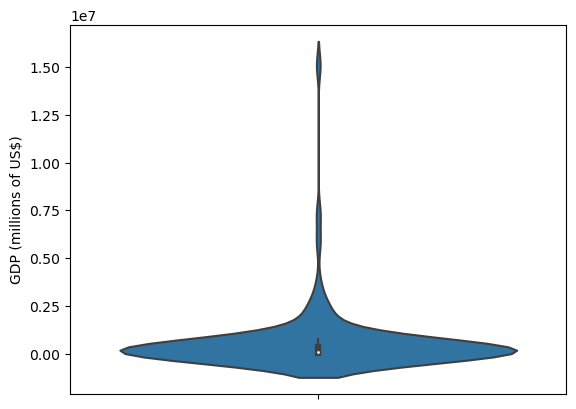

In [130]:
sns.violinplot(y=gdp['GDP (millions of US$)'])

**Nhận xét:**
+ Có thể nhận thấy giá trị GDP phân bố tập trung ở giá trị <2500000, số lượng các quốc gia cao ít hơn rất nhiều

In [ ]:
# Biểu đồ phân bố giá trị GDP Châu Á

<AxesSubplot:ylabel='GDP (millions of US$)'>

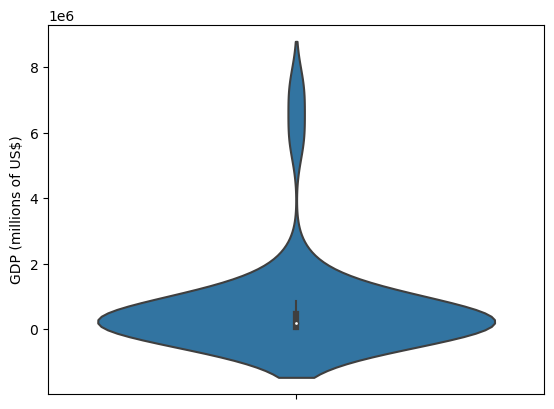

In [133]:
sns.violinplot(y=gdp[gdp.Continent == 'Asia']['GDP (millions of US$)'])

**Nhận xét:**
+ GDP các nước Châu Á có vẻ đồng đều hơn so với thế giới

<AxesSubplot:ylabel='GDP (millions of US$)'>

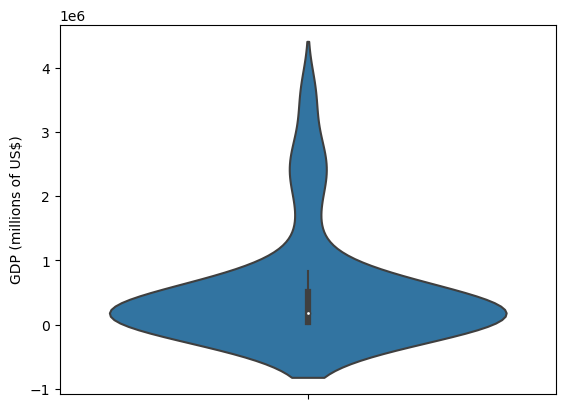

In [135]:
sns.violinplot(y=gdp[gdp.Continent == 'Europe']['GDP (millions of US$)'])

<AxesSubplot:ylabel='GDP (millions of US$)'>

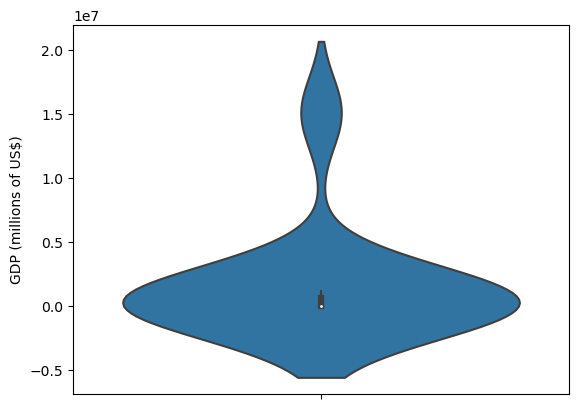

In [136]:
sns.violinplot(y=gdp[gdp.Continent == 'North America']['GDP (millions of US$)'])

In [134]:
gdp.Continent.value_counts()

Europe           37
Asia             36
Africa           29
North America    11
South America     9
Oceania           3
Name: Continent, dtype: int64

### **Vẽ biểu đồ boxplot**

In [ ]:
# Vẽ biểu đồ boxplot nhóm theo Châu Lục

<AxesSubplot:xlabel='Continent', ylabel='GDP (millions of US$)'>

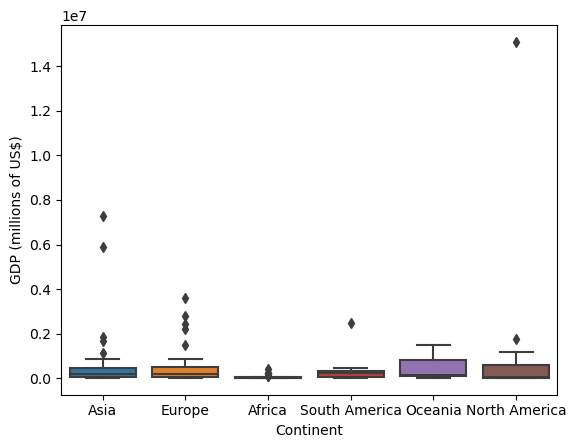

In [137]:
sns.boxplot(x='Continent', y='GDP (millions of US$)', data=gdp)

**Nhận xét:**
+ Nhận thấy rằng Bắc Mỹ có 1 một quốc gia có GDP rất cao, GDP của Châu Phi rất thấp, GDP của Châu Úc thì đồng đều hơn